GRIP: THE SPARKS FOUNDATION

---



DATA SCIENCE AND BUSINESS ANALYTICS: TASK 1

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings as wg
wg.filterwarnings("ignore")

In [83]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [84]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [86]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [87]:
data.shape

(25, 2)

In [88]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [89]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

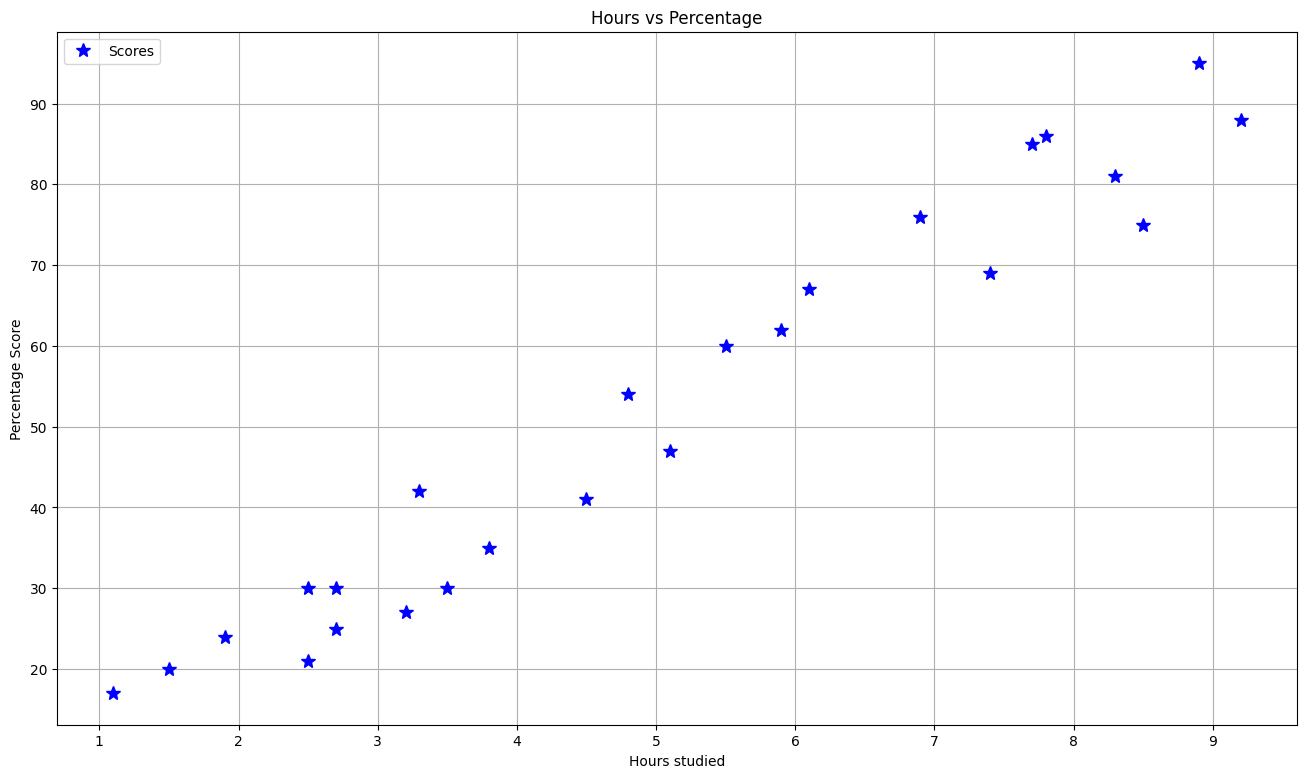

In [90]:
plt.rcParams["figure.figsize"] = [16,9]
data.plot(x='Hours', y='Scores', style='*', color = 'blue' , markersize= 10)
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

In [91]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [107]:
X= data.iloc[:,:1].values
y= data.iloc[:,1:].values

In [108]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [109]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.2, random_state=0)

In [112]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5, 1), (20, 1), (5, 1), (20, 1))

In [113]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [114]:
model.fit(X_train,y_train)

LinearRegression()

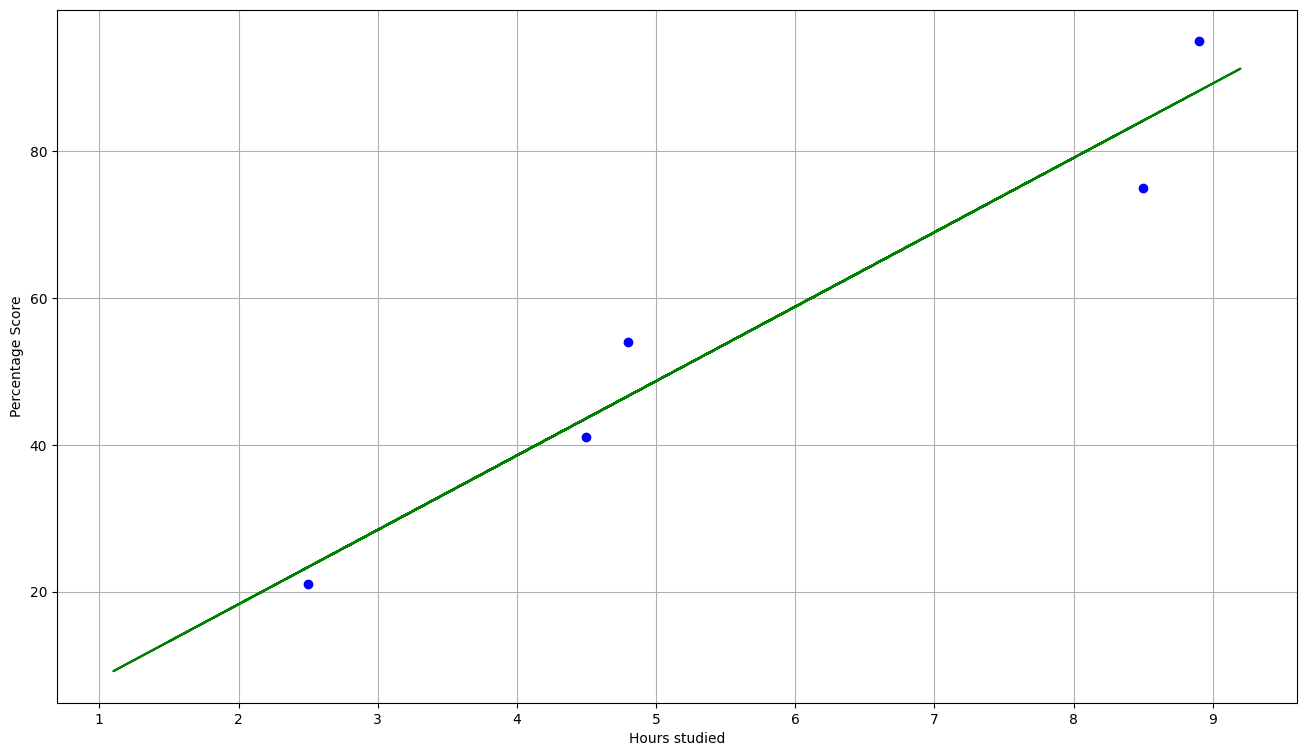

In [115]:
line = model.coef_*X + model.intercept_

plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X, line, color='green');
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()


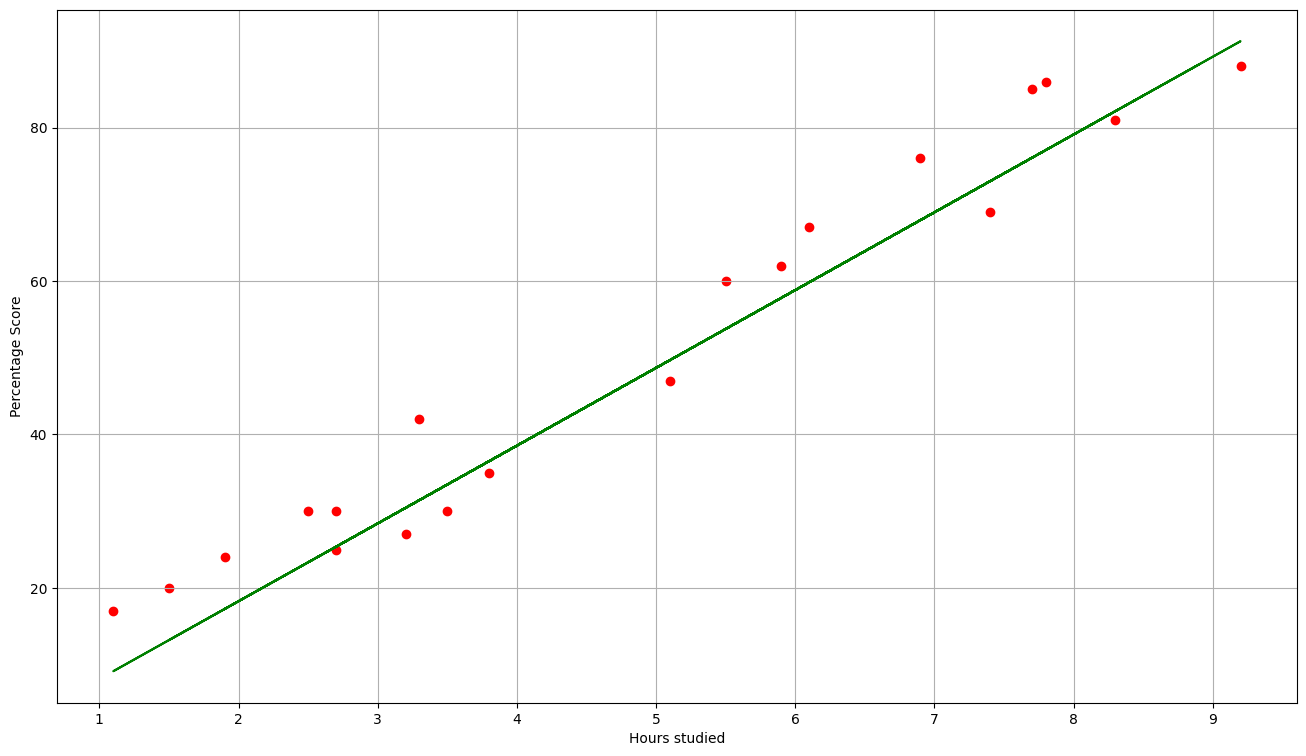

In [116]:

plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X, line, color='green');
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()


In [117]:
print(X_test)
y_pred = model.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]]


In [118]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62],
       [35],
       [24],
       [86],
       [76],
       [17],
       [47],
       [85],
       [42],
       [81],
       [88],
       [67],
       [30],
       [25],
       [60],
       [30]])

In [119]:
y_pred

array([[13.19611447],
       [30.43265949],
       [73.01706485],
       [23.3352586 ],
       [57.80834865],
       [36.51614597],
       [17.25177212],
       [77.0727225 ],
       [67.94749278],
       [ 9.14045681],
       [49.69703334],
       [76.05880809],
       [31.4465739 ],
       [82.14229457],
       [91.26752428],
       [59.83617747],
       [33.47440273],
       [25.36308742],
       [53.752691  ],
       [25.36308742]])

In [120]:
comp = pd.DataFrame({'Actual':[y_test],'Predicted':[y_pred]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62], [35], [24], [86...","[[13.196114465739036], [30.432659490679967], [..."


In [121]:
hours = 9.25
own_pred = model.predict([[hours]])
print("If Student studies for", hours, "then the predicted score is", own_pred[0])

If Student studies for 9.25 then the predicted score is [91.77448149]


In [122]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

mean absolute error: 5.335035442373328
R2 score: 0.9386284428707806
